TF-IDF + Naive Bayes & SVM

1.Cleaning

2.Tokenisasi

3.Stopword Removal

4.Stemming

STEP 1 — Import Library

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


STEP 2 — Upload Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Tiktok Tokopedia Seller Center Reviews.csv to Tiktok Tokopedia Seller Center Reviews (3).csv


STEP 3- LOAD DATASET

In [ ]:
df = pd.read_csv("Tiktok Tokopedia Seller Center Reviews.csv")
df.head()


,content,sentiment
0,tolong keuangan transfer rekening berbeda reke...,negative
1,sumpah ya aplikasi seller buruk tuh duitnya la...,negative
2,susah ribet,negative
3,capai bikin dekripsi tolak kacau,negative
4,pelanggaran upload barang,negative


cek kolom

In [ ]:
df.columns


Index(['content', 'sentiment'], dtype='object')

STEP 4 - DISTRIBUSI SENTIMENT

In [ ]:
df['sentiment'].value_counts()


,count
sentiment,
negative,1755
positive,1390


STEP 5 - PEMISAHAN FITUR DAN LABEL

In [ ]:
X = df['content']
y = df['sentiment']


STEP 6 - SPLIT DATA TRAINING DAN TESTING 80:20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


STEP 7 - EKSTRAKSI FITUR TF-IDF

In [ ]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


STEP 8 - TRAINING MODEL NAIVE BAIYES

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)


STEP 9 — Training Model SVM

📌 Model pembanding berbasis margin

In [ ]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)


STEP 10 - EVALUASI MODEL

In [ ]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9252782193958664
              precision    recall  f1-score   support

    negative       0.92      0.95      0.93       351
    positive       0.94      0.89      0.91       278

    accuracy                           0.93       629
   macro avg       0.93      0.92      0.92       629
weighted avg       0.93      0.93      0.93       629



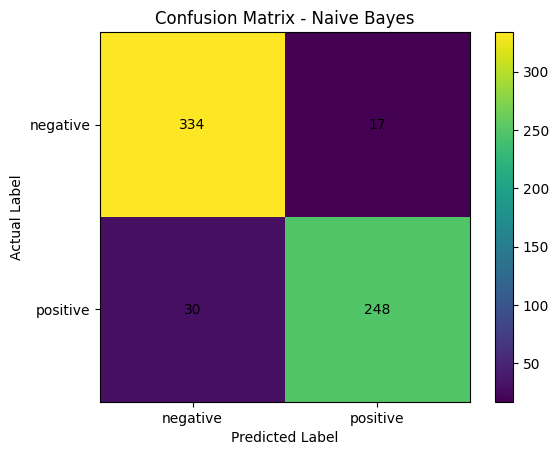

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Hitung confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Visualisasi
plt.figure()
plt.imshow(cm_nb)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()

labels = np.unique(y_test)
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)

# Tambahkan nilai di dalam kotak
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm_nb[i, j], ha="center", va="center")

plt.show()


In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9268680445151033
              precision    recall  f1-score   support

    negative       0.94      0.93      0.93       351
    positive       0.91      0.93      0.92       278

    accuracy                           0.93       629
   macro avg       0.93      0.93      0.93       629
weighted avg       0.93      0.93      0.93       629



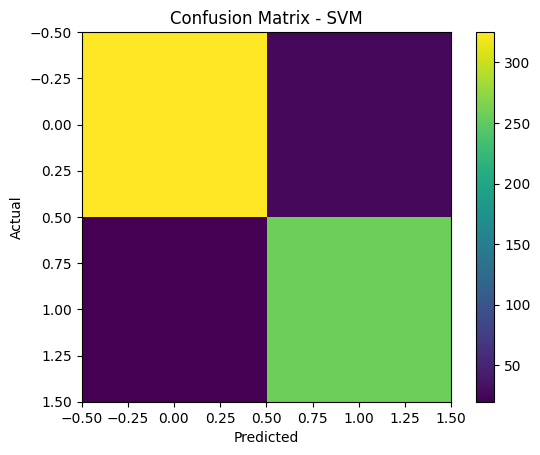

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.imshow(cm)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


**TOKENISASI BEFORE & AFTER CLEANING**

In [ ]:
import pandas as pd
import re


In [ ]:
df = pd.read_csv("Tiktok Tokopedia Seller Center Reviews.csv")


In [ ]:
df['tokens_before_cleaning'] = df['content'].apply(lambda x: x.lower().split())


In [ ]:
def clean_text(text):
    text = text.lower()                              # case folding
    text = re.sub(r"http\S+|www\S+", "", text)       # hapus URL
    text = re.sub(r"[^a-zA-Z\s]", "", text)          # hapus angka & simbol
    text = re.sub(r"\s+", " ", text).strip()         # hapus spasi berlebih
    return text


In [ ]:
df['cleaned_text'] = df['content'].apply(clean_text)


In [ ]:
df['tokens_after_cleaning'] = df['cleaned_text'].apply(lambda x: x.split())


In [ ]:
df[['content',
    'tokens_before_cleaning',
    'cleaned_text',
    'tokens_after_cleaning']].head(10)


,content,tokens_before_cleaning,cleaned_text,tokens_after_cleaning
0,tolong keuangan transfer rekening berbeda reke...,"[tolong, keuangan, transfer, rekening, berbeda...",tolong keuangan transfer rekening berbeda reke...,"[tolong, keuangan, transfer, rekening, berbeda..."
1,sumpah ya aplikasi seller buruk tuh duitnya la...,"[sumpah, ya, aplikasi, seller, buruk, tuh, dui...",sumpah ya aplikasi seller buruk tuh duitnya la...,"[sumpah, ya, aplikasi, seller, buruk, tuh, dui..."
2,susah ribet,"[susah, ribet]",susah ribet,"[susah, ribet]"
3,capai bikin dekripsi tolak kacau,"[capai, bikin, dekripsi, tolak, kacau]",capai bikin dekripsi tolak kacau,"[capai, bikin, dekripsi, tolak, kacau]"
4,pelanggaran upload barang,"[pelanggaran, upload, barang]",pelanggaran upload barang,"[pelanggaran, upload, barang]"
5,saldo masuk beda aplikasi shope tokopedia oris...,"[saldo, masuk, beda, aplikasi, shope, tokopedi...",saldo masuk beda aplikasi shope tokopedia oris...,"[saldo, masuk, beda, aplikasi, shope, tokopedi..."
6,saldo dana berkurangdengan notif transaksi tik...,"[saldo, dana, berkurangdengan, notif, transaks...",saldo dana berkurangdengan notif transaksi tik...,"[saldo, dana, berkurangdengan, notif, transaks..."
7,hancur tiktok seller maunya,"[hancur, tiktok, seller, maunya]",hancur tiktok seller maunya,"[hancur, tiktok, seller, maunya]"
8,approve pesanan masal tolong diperbaiki secepa...,"[approve, pesanan, masal, tolong, diperbaiki, ...",approve pesanan masal tolong diperbaiki secepa...,"[approve, pesanan, masal, tolong, diperbaiki, ..."
9,daftar gagal pas daftar ktp notif mencapai bat...,"[daftar, gagal, pas, daftar, ktp, notif, menca...",daftar gagal pas daftar ktp notif mencapai bat...,"[daftar, gagal, pas, daftar, ktp, notif, menca..."


STEP LANJUTAN — STOPWORD & STEMMING

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Tiktok Tokopedia Seller Center Reviews.csv to Tiktok Tokopedia Seller Center Reviews (4).csv


Install Library Sastrawi

In [ ]:
!pip install Sastrawi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


Import Library

In [ ]:
import pandas as pd
import re

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


Load Dataset

In [ ]:
df = pd.read_csv("Tiktok Tokopedia Seller Center Reviews.csv")
df.head()


,content,sentiment
0,tolong keuangan transfer rekening berbeda reke...,negative
1,sumpah ya aplikasi seller buruk tuh duitnya la...,negative
2,susah ribet,negative
3,capai bikin dekripsi tolak kacau,negative
4,pelanggaran upload barang,negative


Cleaning Text (Recall Tahap Sebelumnya)

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["cleaned_text"] = df["content"].apply(clean_text)


Stopword Removal Bahasa Indonesia

Menghapus kata umum yang tidak membawa makna sentimen

In [ ]:
stop_factory = StopWordRemoverFactory()
stopwords = set(stop_factory.get_stop_words())

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stopwords])

df["text_no_stopword"] = df["cleaned_text"].apply(remove_stopwords)


Stemming Bahasa Indonesia

📌 Mengubah kata ke bentuk dasar

In [ ]:
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

df["text_stemming"] = df["text_no_stopword"].apply(lambda x: stemmer.stem(x))


Tokenisasi Setelah Stopword & Stemming

In [ ]:
df["final_tokens"] = df["text_stemming"].apply(lambda x: x.split())


Tampilkan BEFORE → AFTER (Lengkap)

In [ ]:
df[[
    "content",
    "cleaned_text",
    "text_no_stopword",
    "text_stemming",
    "final_tokens"
]].head(10)


,content,cleaned_text,text_no_stopword,text_stemming,final_tokens
0,tolong keuangan transfer rekening berbeda reke...,tolong keuangan transfer rekening berbeda reke...,keuangan transfer rekening berbeda rekening da...,uang transfer rekening beda rekening daftar bu...,"[uang, transfer, rekening, beda, rekening, daf..."
1,sumpah ya aplikasi seller buruk tuh duitnya la...,sumpah ya aplikasi seller buruk tuh duitnya la...,sumpah aplikasi seller buruk tuh duitnya langs...,sumpah aplikasi seller buruk tuh duit langsung...,"[sumpah, aplikasi, seller, buruk, tuh, duit, l..."
2,susah ribet,susah ribet,susah ribet,susah ribet,"[susah, ribet]"
3,capai bikin dekripsi tolak kacau,capai bikin dekripsi tolak kacau,capai bikin dekripsi tolak kacau,capai bikin dekripsi tolak kacau,"[capai, bikin, dekripsi, tolak, kacau]"
4,pelanggaran upload barang,pelanggaran upload barang,pelanggaran upload barang,langgar upload barang,"[langgar, upload, barang]"
5,saldo masuk beda aplikasi shope tokopedia oris...,saldo masuk beda aplikasi shope tokopedia oris...,saldo masuk beda aplikasi shope tokopedia oris...,saldo masuk beda aplikasi shope tokopedia oris...,"[saldo, masuk, beda, aplikasi, shope, tokopedi..."
6,saldo dana berkurangdengan notif transaksi tik...,saldo dana berkurangdengan notif transaksi tik...,saldo dana berkurangdengan notif transaksi tik...,saldo dana berkurangdengan notif transaksi tik...,"[saldo, dana, berkurangdengan, notif, transaks..."
7,hancur tiktok seller maunya,hancur tiktok seller maunya,hancur tiktok seller maunya,hancur tiktok seller mau,"[hancur, tiktok, seller, mau]"
8,approve pesanan masal tolong diperbaiki secepa...,approve pesanan masal tolong diperbaiki secepa...,approve pesanan masal diperbaiki secepatnya mi...,approve pesan masal baik cepat minggu baik bugnya,"[approve, pesan, masal, baik, cepat, minggu, b..."
9,daftar gagal pas daftar ktp notif mencapai bat...,daftar gagal pas daftar ktp notif mencapai bat...,daftar gagal pas daftar ktp notif mencapai bat...,daftar gagal pas daftar ktp notif capai batas ...,"[daftar, gagal, pas, daftar, ktp, notif, capai..."


Selanjutnya:
5. Label Encoding
6. TF-IDF Vectorization
7. Split Data (Train–Test)
8. Training Model

Naive Bayes

SVM

Evaluasi

Accuracy

Precision, Recall, F1

Confusion Matrix

**TAHAP SELANJUTNYA LABEL ENCODING**

In [ ]:
# Pastikan kolom label benar
# Contoh: positif / negatif
df["label"] = df["sentiment"].map({
    "negative": 0,
    "positive": 1
})

df[["text_stemming", "label"]].head()

,text_stemming,label
0,uang transfer rekening beda rekening daftar bu...,0
1,sumpah aplikasi seller buruk tuh duit langsung...,0
2,susah ribet,0
3,capai bikin dekripsi tolak kacau,0
4,langgar upload barang,0


SPLIT DATA

In [ ]:
from sklearn.model_selection import train_test_split

X = df["text_stemming"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


3️⃣ TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)


4️⃣ Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)

print("=== NAIVE BAYES ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


=== NAIVE BAYES ===
Accuracy: 0.9062003179650239
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       351
           1       0.93      0.85      0.89       278

    accuracy                           0.91       629
   macro avg       0.91      0.90      0.90       629
weighted avg       0.91      0.91      0.91       629

Confusion Matrix:
[[333  18]
 [ 41 237]]


5️⃣ SVM

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("=== SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


=== SVM ===
Accuracy: 0.931637519872814
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       351
           1       0.91      0.94      0.92       278

    accuracy                           0.93       629
   macro avg       0.93      0.93      0.93       629
weighted avg       0.93      0.93      0.93       629

Confusion Matrix:
[[325  26]
 [ 17 261]]


📊 VISUALISASI CONFUSION MATRIX (NAIVE BAYES & SVM)

1️⃣ Import library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


2️⃣ Confusion Matrix Naive Bayes

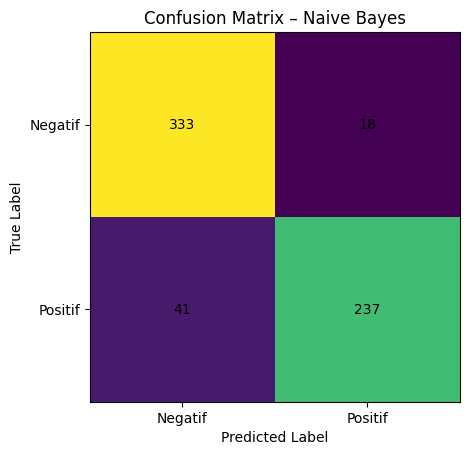

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
labels = ["Negatif", "Positif"]

plt.figure()
plt.imshow(cm_nb)
plt.title("Confusion Matrix – Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)

for i in range(cm_nb.shape[0]):
    for j in range(cm_nb.shape[1]):
        plt.text(j, i, cm_nb[i, j], ha="center", va="center")

plt.show()


3️⃣ Confusion Matrix SVM

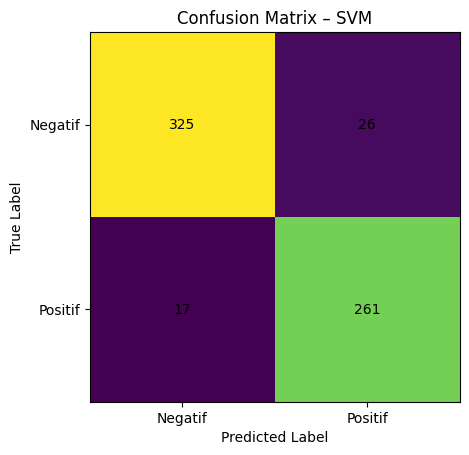

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure()
plt.imshow(cm_svm)
plt.title("Confusion Matrix – SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)

for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        plt.text(j, i, cm_svm[i, j], ha="center", va="center")

plt.show()


TAHAP TERAKHIR
1️⃣ SCRIPT EVALUASI MODEL (NB & SVM)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ===== NAIVE BAYES =====
acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# ===== SVM =====
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("=== EVALUASI NAIVE BAYES ===")
print("Accuracy :", acc_nb)
print("Precision:", prec_nb)
print("Recall   :", rec_nb)
print("F1-Score :", f1_nb)

print("\n=== EVALUASI SVM ===")
print("Accuracy :", acc_svm)
print("Precision:", prec_svm)
print("Recall   :", rec_svm)
print("F1-Score :", f1_svm)


=== EVALUASI NAIVE BAYES ===
Accuracy : 0.9062003179650239
Precision: 0.9294117647058824
Recall   : 0.8525179856115108
F1-Score : 0.8893058161350844

=== EVALUASI SVM ===
Accuracy : 0.931637519872814
Precision: 0.9094076655052264
Recall   : 0.9388489208633094
F1-Score : 0.9238938053097345


In [1]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.8 MB/s eta 0:00:00


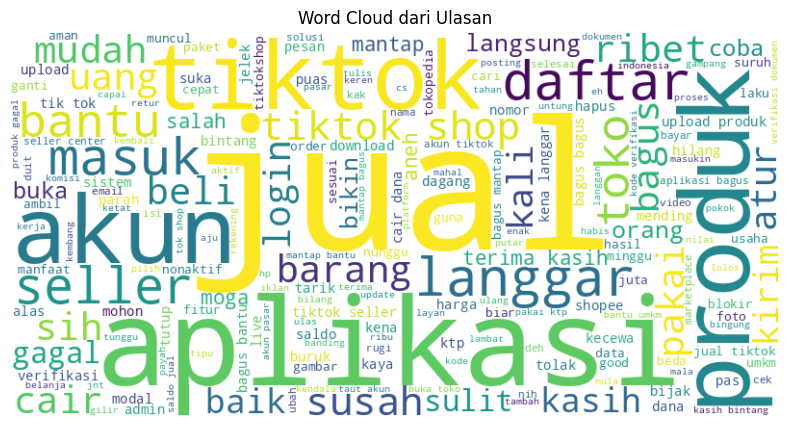

In [5]:
!pip install Sastrawi

import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Re-load dataset to ensure df is defined
df = pd.read_csv("Tiktok Tokopedia Seller Center Reviews.csv")

# Define cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply cleaning
df["cleaned_text"] = df["content"].apply(clean_text)

# Initialize StopWordRemoverFactory and apply
stop_factory = StopWordRemoverFactory()
stopwords = set(stop_factory.get_stop_words())
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stopwords])
df["text_no_stopword"] = df["cleaned_text"].apply(remove_stopwords)

# Initialize StemmerFactory and apply
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()
df["text_stemming"] = df["text_no_stopword"].apply(lambda x: stemmer.stem(x))

# Gabungkan semua teks yang sudah di-stemming menjadi satu string
all_words = ' '.join([text for text in df['text_stemming']])

# Buat objek WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    min_font_size=10
).generate(all_words)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Ulasan')
plt.show()